C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


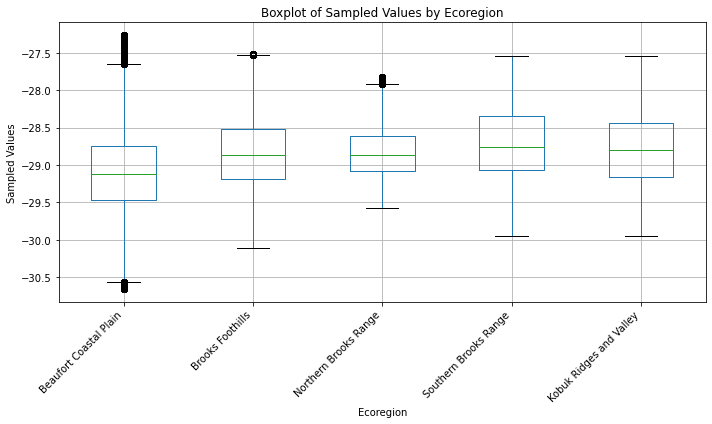

In [1]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\d13c_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_d13c_ymax.tif': ('Beaufort Coastal Plain', 27780),
    'Beaufort_Coastal_Plain_Floodplain_site6ab_d13c_ymax.tif': ('Beaufort Coastal Plain', 19244),
    'Beaufort_Coastal_Plain_Coastal_Plain_site6c_d13c_ymax.tif': ('Beaufort Coastal Plain', 179792),
    'Beaufort_Coastal_Plain_Floodplain_site6c_d13c_ymax.tif': ('Beaufort Coastal Plain', 120541),    
    'Beaufort_Coastal_Plain_Coastal_Plain_site7_d13c_ymax.tif': ('Beaufort Coastal Plain', 28012),
    'Beaufort_Coastal_Plain_Floodplain_site7_d13c_ymax.tif': ('Beaufort Coastal Plain', 241699),
    'Brooks_Foothills_Floodplain_site4a_d13c_ymax.tif': ('Brooks Foothills', 78111),   
    'Brooks_Foothills_Glaciated_Upland_site4a_d13c_ymax.tif': ('Brooks Foothills', 280905),
    'Brooks_Foothills_Upland_site4a_d13c_ymax.tif': ('Brooks Foothills', 7607),      
    'Brooks_Foothills_Glaciated_Upland_site4b_d13c_ymax.tif': ('Brooks Foothills', 249184),
    'Brooks_Foothills_Upland_site6c_d13c_ymax.tif': ('Brooks Foothills', 1261),  
     
    'Northern_Brooks_Range_Glaciated_Valley_site3b_d13c_ymax.tif': ('Northern Brooks Range', 2851),
    'Northern_Brooks_Range_Mountain_Rugged_site3b_d13c_ymax.tif': ('Northern Brooks Range', 614220),   
    'Southern_Brooks_Range_Floodplain_site2a_c_1b_d13c_ymax.tif': ('Southern Brooks Range', 69268),
    'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_d13c_ymax.tif': ('Southern Brooks Range',212758),
    'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_d13c_ymax.tif': ('Southern Brooks Range', 195203),
    'Southern_Brooks_Range_Floodplain_site3b_d13c_ymax.tif': ('Southern Brooks Range', 12779),
    'Southern_Brooks_Range_Glaciated_Valley_site3b_d13c_ymax.tif': ('Southern Brooks Range', 96026),
    'Southern_Brooks_Range_Mountain_Rugged_site3b_d13c_ymax.tif': ('Southern Brooks Range', 31034),
    'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_d13c_ymax.tif': ('Kobuk Ridges and Valley', 1215),
    'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif': ('Kobuk Ridges and Valley', 615855)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


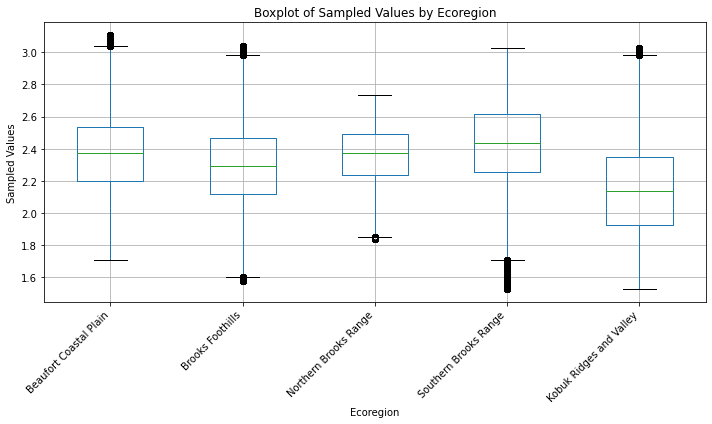

In [2]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\d13c_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_d13c_std.tif': ('Beaufort Coastal Plain', 27780),
    'Beaufort_Coastal_Plain_Floodplain_site6ab_d13c_std.tif': ('Beaufort Coastal Plain', 19244),
    'Beaufort_Coastal_Plain_Coastal_Plain_site6c_d13c_std.tif': ('Beaufort Coastal Plain', 179792),
    'Beaufort_Coastal_Plain_Floodplain_site6c_d13c_std.tif': ('Beaufort Coastal Plain', 120541),    
    'Beaufort_Coastal_Plain_Coastal_Plain_site7_d13c_std.tif': ('Beaufort Coastal Plain', 28012),
    'Beaufort_Coastal_Plain_Floodplain_site7_d13c_std.tif': ('Beaufort Coastal Plain', 241699),
    'Brooks_Foothills_Floodplain_site4a_d13c_std.tif': ('Brooks Foothills', 78111),   
    'Brooks_Foothills_Glaciated_Upland_site4a_d13c_std.tif': ('Brooks Foothills', 280905),
    'Brooks_Foothills_Upland_site4a_d13c_std.tif': ('Brooks Foothills', 7607),      
    'Brooks_Foothills_Glaciated_Upland_site4b_d13c_std.tif': ('Brooks Foothills', 249184),
    'Brooks_Foothills_Upland_site6c_d13c_std.tif': ('Brooks Foothills', 1261),  
     
    'Northern_Brooks_Range_Glaciated_Valley_site3b_d13c_std.tif': ('Northern Brooks Range', 2851),
    'Northern_Brooks_Range_Mountain_Rugged_site3b_d13c_std.tif': ('Northern Brooks Range', 614220),   
    'Southern_Brooks_Range_Floodplain_site2a_c_1b_d13c_std.tif': ('Southern Brooks Range', 69268),
    'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_d13c_std.tif': ('Southern Brooks Range',212758),
    'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_d13c_std.tif': ('Southern Brooks Range', 195203),
    'Southern_Brooks_Range_Floodplain_site3b_d13c_std.tif': ('Southern Brooks Range', 12779),
    'Southern_Brooks_Range_Glaciated_Valley_site3b_d13c_std.tif': ('Southern Brooks Range', 96026),
    'Southern_Brooks_Range_Mountain_Rugged_site3b_d13c_std.tif': ('Southern Brooks Range', 31034),
    'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_d13c_std.tif': ('Kobuk Ridges and Valley', 1215),
    'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_d13c_std.tif': ('Kobuk Ridges and Valley', 615855)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


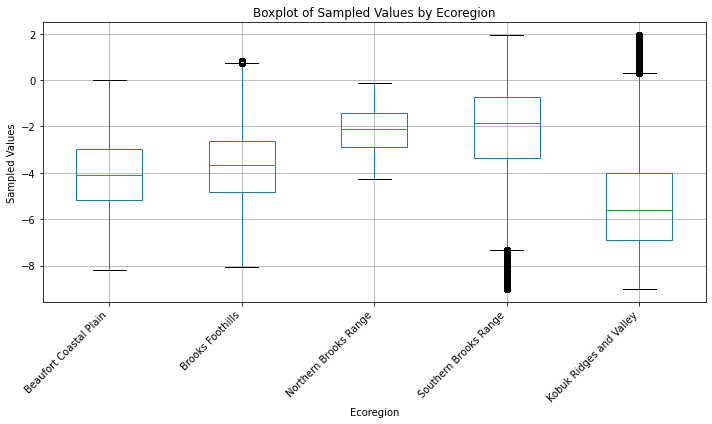

In [3]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\d15n_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_d15n_ymax.tif': ('Beaufort Coastal Plain', 27012),
'Beaufort_Coastal_Plain_Floodplain_site6ab_d15n_ymax.tif': ('Beaufort Coastal Plain', 18711),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_d15n_ymax.tif': ('Beaufort Coastal Plain', 174819),
'Beaufort_Coastal_Plain_Floodplain_site6c_d15n_ymax.tif': ('Beaufort Coastal Plain', 117206),
'Beaufort_Coastal_Plain_Coastal_Plain_site7_d15n_ymax.tif': ('Beaufort Coastal Plain', 27237),
'Beaufort_Coastal_Plain_Floodplain_site7_d15n_ymax.tif': ('Beaufort Coastal Plain', 235012),
'Brooks_Foothills_Floodplain_site4a_d15n_ymax.tif': ('Brooks Foothills', 75950),
'Brooks_Foothills_Glaciated_Upland_site4a_d15n_ymax.tif': ('Brooks Foothills', 273134),
'Brooks_Foothills_Upland_site4a_d15n_ymax.tif': ('Brooks Foothills', 7396),
'Brooks_Foothills_Glaciated_Upland_site4b_d15n_ymax.tif': ('Brooks Foothills', 242291),
'Brooks_Foothills_Upland_site6c_d15n_ymax.tif': ('Brooks Foothills', 1226),
'Northern_Brooks_Range_Glaciated_Valley_site3b_d15n_ymax.tif': ('Northern Brooks Range', 2772),
'Northern_Brooks_Range_Mountain_Rugged_site3b_d15n_ymax.tif': ('Northern Brooks Range', 597227),
'Southern_Brooks_Range_Floodplain_site2a_c_1b_d15n_ymax.tif': ('Southern Brooks Range', 67351),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_d15n_ymax.tif': ('Southern Brooks Range',206872),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_d15n_ymax.tif': ('Southern Brooks Range', 189803),
'Southern_Brooks_Range_Floodplain_site3b_d15n_ymax.tif': ('Southern Brooks Range', 12425),
'Southern_Brooks_Range_Glaciated_Valley_site3b_d15n_ymax.tif': ('Southern Brooks Range', 93369),
'Southern_Brooks_Range_Mountain_Rugged_site3b_d15n_ymax.tif': ('Southern Brooks Range', 30176),
'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_d15n_ymax.tif': ('Kobuk Ridges and Valley', 1182),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_d15n_ymax.tif': ('Kobuk Ridges and Valley', 597227)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


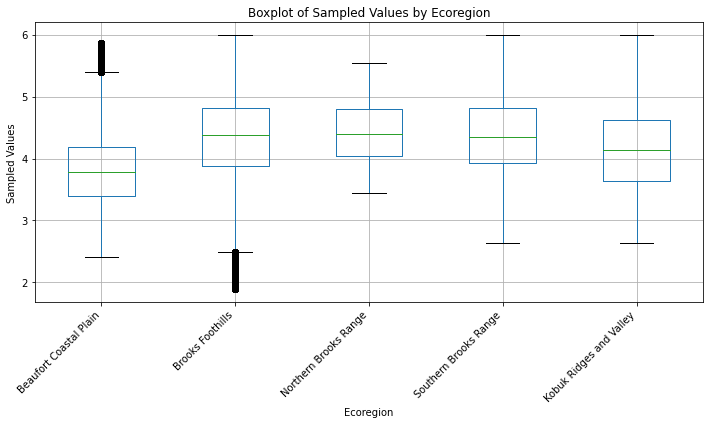

In [4]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\d15n_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_d15n_std.tif': ('Beaufort Coastal Plain', 27012),
'Beaufort_Coastal_Plain_Floodplain_site6ab_d15n_std.tif': ('Beaufort Coastal Plain', 18711),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_d15n_std.tif': ('Beaufort Coastal Plain', 174819),
'Beaufort_Coastal_Plain_Floodplain_site6c_d15n_std.tif': ('Beaufort Coastal Plain', 117206),
'Beaufort_Coastal_Plain_Coastal_Plain_site7_d15n_std.tif': ('Beaufort Coastal Plain', 27237),
'Beaufort_Coastal_Plain_Floodplain_site7_d15n_std.tif': ('Beaufort Coastal Plain', 235012),
'Brooks_Foothills_Floodplain_site4a_d15n_std.tif': ('Brooks Foothills', 75950),
'Brooks_Foothills_Glaciated_Upland_site4a_d15n_std.tif': ('Brooks Foothills', 273134),
'Brooks_Foothills_Upland_site4a_d15n_std.tif': ('Brooks Foothills', 7396),
'Brooks_Foothills_Glaciated_Upland_site4b_d15n_std.tif': ('Brooks Foothills', 242291),
'Brooks_Foothills_Upland_site6c_d15n_std.tif': ('Brooks Foothills', 1226),
'Northern_Brooks_Range_Glaciated_Valley_site3b_d15n_std.tif': ('Northern Brooks Range', 2772),
'Northern_Brooks_Range_Mountain_Rugged_site3b_d15n_std.tif': ('Northern Brooks Range', 597227),
'Southern_Brooks_Range_Floodplain_site2a_c_1b_d15n_std.tif': ('Southern Brooks Range', 67351),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_d15n_std.tif': ('Southern Brooks Range',206872),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_d15n_std.tif': ('Southern Brooks Range', 189803),
'Southern_Brooks_Range_Floodplain_site3b_d15n_std.tif': ('Southern Brooks Range', 12425),
'Southern_Brooks_Range_Glaciated_Valley_site3b_d15n_std.tif': ('Southern Brooks Range', 93369),
'Southern_Brooks_Range_Mountain_Rugged_site3b_d15n_std.tif': ('Southern Brooks Range', 30176),
'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_d15n_std.tif': ('Kobuk Ridges and Valley', 1182),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_d15n_std.tif': ('Kobuk Ridges and Valley', 597227)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


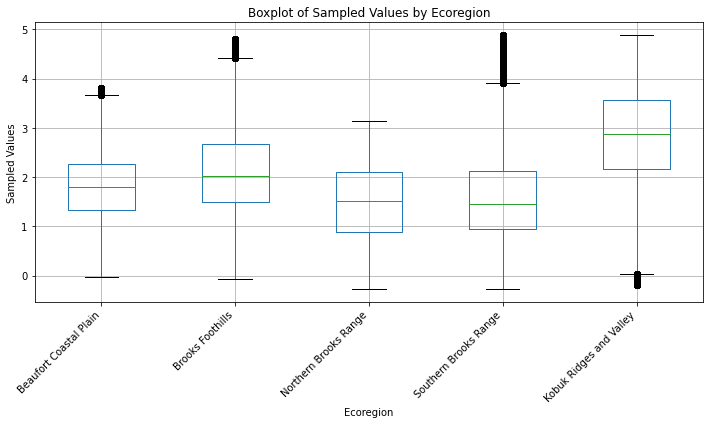

In [5]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\la_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_la_ymax.tif': ('Beaufort Coastal Plain', 27012),
'Beaufort_Coastal_Plain_Floodplain_site6ab_la_ymax.tif': ('Beaufort Coastal Plain', 18711),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_la_ymax.tif': ('Beaufort Coastal Plain', 174819),
'Beaufort_Coastal_Plain_Floodplain_site6c_la_ymax.tif': ('Beaufort Coastal Plain', 117206),
'Beaufort_Coastal_Plain_Coastal_Plain_site7_la_ymax.tif': ('Beaufort Coastal Plain', 27237),
'Beaufort_Coastal_Plain_Floodplain_site7_la_ymax.tif': ('Beaufort Coastal Plain', 235012),
'Brooks_Foothills_Floodplain_site4a_la_ymax.tif': ('Brooks Foothills', 75950),
'Brooks_Foothills_Glaciated_Upland_site4a_la_ymax.tif': ('Brooks Foothills', 273134),
'Brooks_Foothills_Upland_site4a_la_ymax.tif': ('Brooks Foothills', 7396),
'Brooks_Foothills_Glaciated_Upland_site4b_la_ymax.tif': ('Brooks Foothills', 242291),
'Brooks_Foothills_Upland_site6c_la_ymax.tif': ('Brooks Foothills', 1226),
'Northern_Brooks_Range_Glaciated_Valley_site3b_la_ymax.tif': ('Northern Brooks Range', 2772),
'Northern_Brooks_Range_Mountain_Rugged_site3b_la_ymax.tif': ('Northern Brooks Range', 597227),
'Southern_Brooks_Range_Floodplain_site2a_c_1b_la_ymax.tif': ('Southern Brooks Range', 67351),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_la_ymax.tif': ('Southern Brooks Range',206872),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_la_ymax.tif': ('Southern Brooks Range', 189803),
'Southern_Brooks_Range_Floodplain_site3b_la_ymax.tif': ('Southern Brooks Range', 12425),
'Southern_Brooks_Range_Glaciated_Valley_site3b_la_ymax.tif': ('Southern Brooks Range', 93369),
'Southern_Brooks_Range_Mountain_Rugged_site3b_la_ymax.tif': ('Southern Brooks Range', 30176),
    'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_la_ymax.tif': ('Kobuk Ridges and Valley', 1182),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_la_ymax.tif': ('Kobuk Ridges and Valley', 597227)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


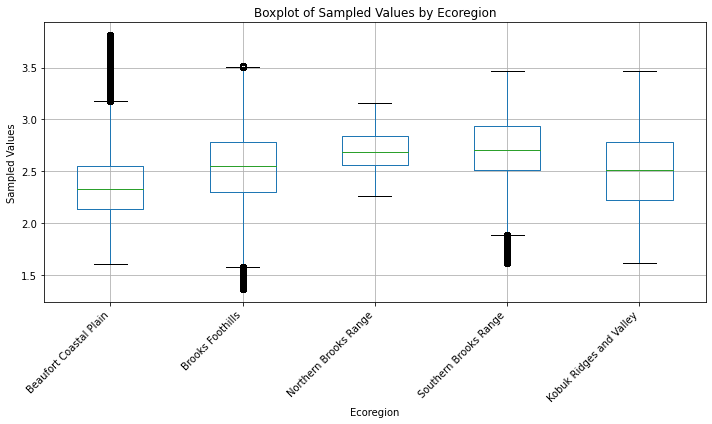

In [6]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\la_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_la_std.tif': ('Beaufort Coastal Plain', 27012),
'Beaufort_Coastal_Plain_Floodplain_site6ab_la_std.tif': ('Beaufort Coastal Plain', 18711),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_la_std.tif': ('Beaufort Coastal Plain', 174819),
'Beaufort_Coastal_Plain_Floodplain_site6c_la_std.tif': ('Beaufort Coastal Plain', 117206),
'Beaufort_Coastal_Plain_Coastal_Plain_site7_la_std.tif': ('Beaufort Coastal Plain', 27237),
'Beaufort_Coastal_Plain_Floodplain_site7_la_std.tif': ('Beaufort Coastal Plain', 235012),
'Brooks_Foothills_Floodplain_site4a_la_std.tif': ('Brooks Foothills', 75950),
'Brooks_Foothills_Glaciated_Upland_site4a_la_std.tif': ('Brooks Foothills', 273134),
'Brooks_Foothills_Upland_site4a_la_std.tif': ('Brooks Foothills', 7396),
'Brooks_Foothills_Glaciated_Upland_site4b_la_std.tif': ('Brooks Foothills', 242291),
'Brooks_Foothills_Upland_site6c_la_std.tif': ('Brooks Foothills', 1226),
'Northern_Brooks_Range_Glaciated_Valley_site3b_la_std.tif': ('Northern Brooks Range', 2772),
'Northern_Brooks_Range_Mountain_Rugged_site3b_la_std.tif': ('Northern Brooks Range', 597227),
'Southern_Brooks_Range_Floodplain_site2a_c_1b_la_std.tif': ('Southern Brooks Range', 67351),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_la_std.tif': ('Southern Brooks Range',206872),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_la_std.tif': ('Southern Brooks Range', 189803),
'Southern_Brooks_Range_Floodplain_site3b_la_std.tif': ('Southern Brooks Range', 12425),
'Southern_Brooks_Range_Glaciated_Valley_site3b_la_std.tif': ('Southern Brooks Range', 93369),
'Southern_Brooks_Range_Mountain_Rugged_site3b_la_std.tif': ('Southern Brooks Range', 30176),
'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_la_std.tif': ('Kobuk Ridges and Valley', 1182),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_la_std.tif': ('Kobuk Ridges and Valley', 597227)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


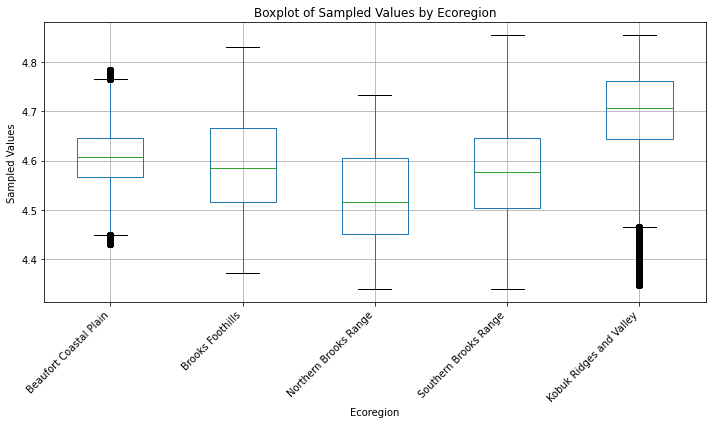

In [7]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\sla_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_sla_ymax.tif': ('Beaufort Coastal Plain', 45020),
'Beaufort_Coastal_Plain_Floodplain_site6ab_sla_ymax.tif': ('Beaufort Coastal Plain', 31180),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_sla_ymax.tif': ('Beaufort Coastal Plain', 291360),
'Beaufort_Coastal_Plain_Floodplain_site6c_sla_ymax.tif': ('Beaufort Coastal Plain', 195340),
'Beaufort_Coastal_Plain_Coastal_Plain_site7_sla_ymax.tif': ('Beaufort Coastal Plain', 45390),
'Beaufort_Coastal_Plain_Floodplain_site7_sla_ymax.tif': ('Beaufort Coastal Plain', 391680),
'Brooks_Foothills_Floodplain_site4a_sla_ymax.tif': ('Brooks Foothills', 126580),
'Brooks_Foothills_Glaciated_Upland_site4a_sla_ymax.tif': ('Brooks Foothills', 455220),
'Brooks_Foothills_Upland_site4a_sla_ymax.tif': ('Brooks Foothills', 12320),
'Brooks_Foothills_Glaciated_Upland_site4b_sla_ymax.tif': ('Brooks Foothills', 403810),
'Brooks_Foothills_Upland_site6c_sla_ymax.tif': ('Brooks Foothills', 2040),
'Northern_Brooks_Range_Glaciated_Valley_site3b_sla_ymax.tif': ('Northern Brooks Range', 4620),
'Northern_Brooks_Range_Mountain_Rugged_site3b_sla_ymax.tif': ('Northern Brooks Range', 995370),
'Southern_Brooks_Range_Floodplain_site2a_c_1b_sla_ymax.tif': ('Southern Brooks Range', 112250),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_sla_ymax.tif': ('Southern Brooks Range',344780),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_sla_ymax.tif': ('Southern Brooks Range', 316330),
'Southern_Brooks_Range_Floodplain_site3b_sla_ymax.tif': ('Southern Brooks Range', 20700),
'Southern_Brooks_Range_Glaciated_Valley_site3b_sla_ymax.tif': ('Southern Brooks Range', 155610),
'Southern_Brooks_Range_Mountain_Rugged_site3b_sla_ymax.tif': ('Southern Brooks Range', 50290),
'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_sla_ymax.tif': ('Kobuk Ridges and Valley', 1970),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_sla_ymax.tif': ('Kobuk Ridges and Valley', 998020)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


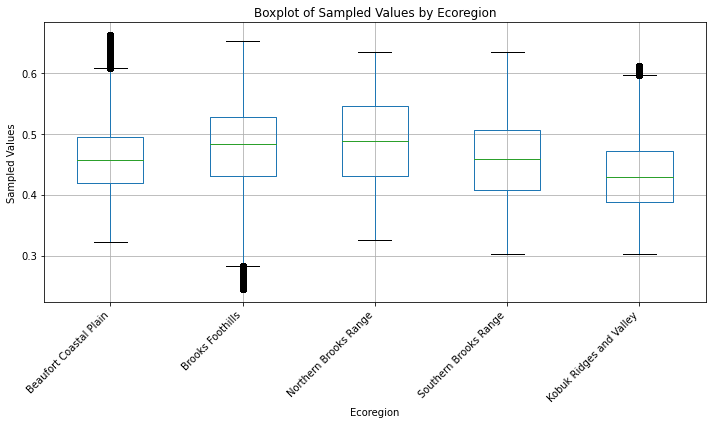

In [8]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\sla_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_sla_std.tif': ('Beaufort Coastal Plain', 27012),
'Beaufort_Coastal_Plain_Floodplain_site6ab_sla_std.tif': ('Beaufort Coastal Plain', 18711),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_sla_std.tif': ('Beaufort Coastal Plain', 174819),
'Beaufort_Coastal_Plain_Floodplain_site6c_sla_std.tif': ('Beaufort Coastal Plain', 117206),
'Beaufort_Coastal_Plain_Coastal_Plain_site7_sla_std.tif': ('Beaufort Coastal Plain', 27237),
'Beaufort_Coastal_Plain_Floodplain_site7_sla_std.tif': ('Beaufort Coastal Plain', 235012),
'Brooks_Foothills_Floodplain_site4a_sla_std.tif': ('Brooks Foothills', 75950),
'Brooks_Foothills_Glaciated_Upland_site4a_sla_std.tif': ('Brooks Foothills', 273134),
'Brooks_Foothills_Upland_site4a_sla_std.tif': ('Brooks Foothills', 7396),
'Brooks_Foothills_Glaciated_Upland_site4b_sla_std.tif': ('Brooks Foothills', 242291),
'Brooks_Foothills_Upland_site6c_sla_std.tif': ('Brooks Foothills', 1226),
'Northern_Brooks_Range_Glaciated_Valley_site3b_sla_std.tif': ('Northern Brooks Range', 2772),
'Northern_Brooks_Range_Mountain_Rugged_site3b_sla_std.tif': ('Northern Brooks Range', 597227),
'Southern_Brooks_Range_Floodplain_site2a_c_1b_sla_std.tif': ('Southern Brooks Range', 67351),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_sla_std.tif': ('Southern Brooks Range',206872),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_sla_std.tif': ('Southern Brooks Range', 189803),
'Southern_Brooks_Range_Floodplain_site3b_sla_std.tif': ('Southern Brooks Range', 12425),
'Southern_Brooks_Range_Glaciated_Valley_site3b_sla_std.tif': ('Southern Brooks Range', 93369),
'Southern_Brooks_Range_Mountain_Rugged_site3b_sla_std.tif': ('Southern Brooks Range', 30176),
'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_sla_std.tif': ('Kobuk Ridges and Valley', 1182),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_sla_std.tif': ('Kobuk Ridges and Valley', 597227)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


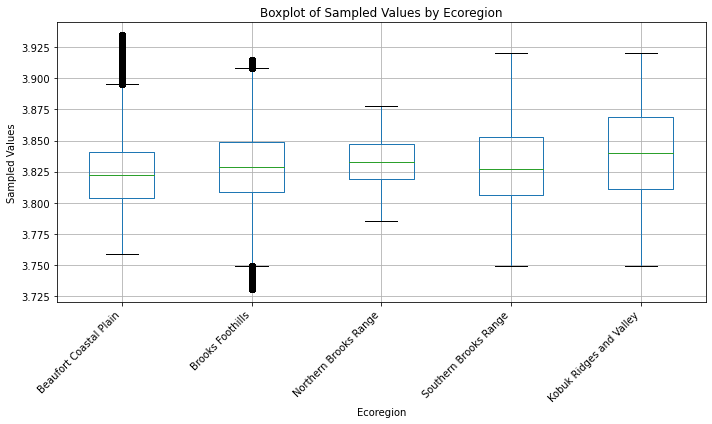

In [9]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\pc_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_pc_ymax.tif': ('Beaufort Coastal Plain', 27012),
'Beaufort_Coastal_Plain_Floodplain_site6ab_pc_ymax.tif': ('Beaufort Coastal Plain', 18711),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_pc_ymax.tif': ('Beaufort Coastal Plain', 174819),
'Beaufort_Coastal_Plain_Floodplain_site6c_pc_ymax.tif': ('Beaufort Coastal Plain', 117206),
'Beaufort_Coastal_Plain_Coastal_Plain_site7_pc_ymax.tif': ('Beaufort Coastal Plain', 27237),
'Beaufort_Coastal_Plain_Floodplain_site7_pc_ymax.tif': ('Beaufort Coastal Plain', 235012),
'Brooks_Foothills_Floodplain_site4a_pc_ymax.tif': ('Brooks Foothills', 75950),
'Brooks_Foothills_Glaciated_Upland_site4a_pc_ymax.tif': ('Brooks Foothills', 273134),
'Brooks_Foothills_Upland_site4a_pc_ymax.tif': ('Brooks Foothills', 7396),
'Brooks_Foothills_Glaciated_Upland_site4b_pc_ymax.tif': ('Brooks Foothills', 242291),
'Brooks_Foothills_Upland_site6c_pc_ymax.tif': ('Brooks Foothills', 1226),

'Northern_Brooks_Range_Glaciated_Valley_site3b_pc_ymax.tif': ('Northern Brooks Range', 2772),
'Northern_Brooks_Range_Mountain_Rugged_site3b_pc_ymax.tif': ('Northern Brooks Range', 597227),
'Southern_Brooks_Range_Floodplain_site2a_c_1b_pc_ymax.tif': ('Southern Brooks Range', 67351),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_pc_ymax.tif': ('Southern Brooks Range',206872),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_pc_ymax.tif': ('Southern Brooks Range', 189803),
'Southern_Brooks_Range_Floodplain_site3b_pc_ymax.tif': ('Southern Brooks Range', 12425),
'Southern_Brooks_Range_Glaciated_Valley_site3b_pc_ymax.tif': ('Southern Brooks Range', 93369),
'Southern_Brooks_Range_Mountain_Rugged_site3b_pc_ymax.tif': ('Southern Brooks Range', 30176),
    'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_pc_ymax.tif': ('Kobuk Ridges and Valley', 1182),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_pc_ymax.tif': ('Kobuk Ridges and Valley', 597227)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


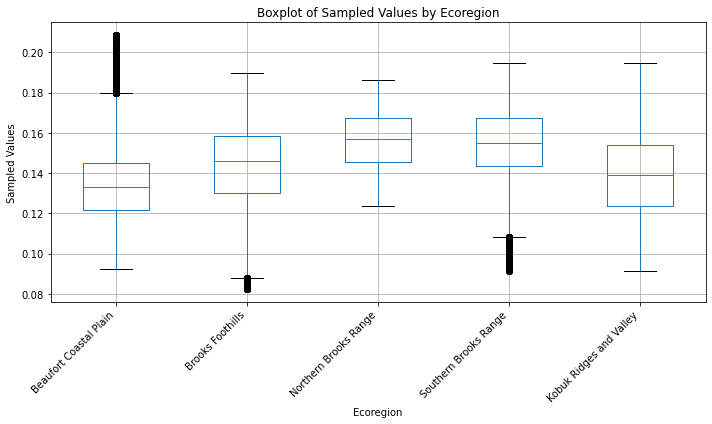

In [10]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\pc_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_pc_std.tif': ('Beaufort Coastal Plain', 27012),
'Beaufort_Coastal_Plain_Floodplain_site6ab_pc_std.tif': ('Beaufort Coastal Plain', 18711),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_pc_std.tif': ('Beaufort Coastal Plain', 174819),
'Beaufort_Coastal_Plain_Floodplain_site6c_pc_std.tif': ('Beaufort Coastal Plain', 117206),
'Beaufort_Coastal_Plain_Coastal_Plain_site7_pc_std.tif': ('Beaufort Coastal Plain', 27237),
'Beaufort_Coastal_Plain_Floodplain_site7_pc_std.tif': ('Beaufort Coastal Plain', 235012),
'Brooks_Foothills_Floodplain_site4a_pc_std.tif': ('Brooks Foothills', 75950),
'Brooks_Foothills_Glaciated_Upland_site4a_pc_std.tif': ('Brooks Foothills', 273134),
'Brooks_Foothills_Upland_site4a_pc_std.tif': ('Brooks Foothills', 7396),
'Brooks_Foothills_Glaciated_Upland_site4b_pc_std.tif': ('Brooks Foothills', 242291),
'Brooks_Foothills_Upland_site6c_pc_std.tif': ('Brooks Foothills', 1226),

'Northern_Brooks_Range_Glaciated_Valley_site3b_pc_std.tif': ('Northern Brooks Range', 2772),
'Northern_Brooks_Range_Mountain_Rugged_site3b_pc_std.tif': ('Northern Brooks Range', 597227),
'Southern_Brooks_Range_Floodplain_site2a_c_1b_pc_std.tif': ('Southern Brooks Range', 67351),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_pc_std.tif': ('Southern Brooks Range',206872),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_pc_std.tif': ('Southern Brooks Range', 189803),
'Southern_Brooks_Range_Floodplain_site3b_pc_std.tif': ('Southern Brooks Range', 12425),
'Southern_Brooks_Range_Glaciated_Valley_site3b_pc_std.tif': ('Southern Brooks Range', 93369),
'Southern_Brooks_Range_Mountain_Rugged_site3b_pc_std.tif': ('Southern Brooks Range', 30176),
    'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_pc_std.tif': ('Kobuk Ridges and Valley', 1182),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_pc_std.tif': ('Kobuk Ridges and Valley', 597227)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


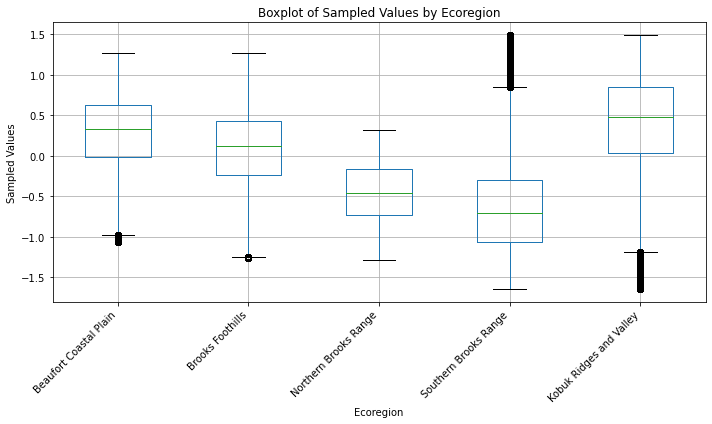

In [11]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\ldmc_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_ldmc_ymax.tif': ('Beaufort Coastal Plain', 27012),
'Beaufort_Coastal_Plain_Floodplain_site6ab_ldmc_ymax.tif': ('Beaufort Coastal Plain', 18711),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_ldmc_ymax.tif': ('Beaufort Coastal Plain', 174819),
'Beaufort_Coastal_Plain_Floodplain_site6c_ldmc_ymax.tif': ('Beaufort Coastal Plain', 117206),
'Beaufort_Coastal_Plain_Coastal_Plain_site7_ldmc_ymax.tif': ('Beaufort Coastal Plain', 27237),
'Beaufort_Coastal_Plain_Floodplain_site7_ldmc_ymax.tif': ('Beaufort Coastal Plain', 235012),
'Brooks_Foothills_Floodplain_site4a_ldmc_ymax.tif': ('Brooks Foothills', 75950),
'Brooks_Foothills_Glaciated_Upland_site4a_ldmc_ymax.tif': ('Brooks Foothills', 273134),
'Brooks_Foothills_Upland_site4a_ldmc_ymax.tif': ('Brooks Foothills', 7396),
'Brooks_Foothills_Glaciated_Upland_site4b_ldmc_ymax.tif': ('Brooks Foothills', 242291),
'Brooks_Foothills_Upland_site6c_ldmc_ymax.tif': ('Brooks Foothills', 1226),
'Northern_Brooks_Range_Glaciated_Valley_site3b_ldmc_ymax.tif': ('Northern Brooks Range', 2772),
'Northern_Brooks_Range_Mountain_Rugged_site3b_ldmc_ymax.tif': ('Northern Brooks Range', 597227),
'Southern_Brooks_Range_Floodplain_site2a_c_1b_ldmc_ymax.tif': ('Southern Brooks Range', 67351),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_ldmc_ymax.tif': ('Southern Brooks Range',206872),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_ldmc_ymax.tif': ('Southern Brooks Range', 189803),
'Southern_Brooks_Range_Floodplain_site3b_ldmc_ymax.tif': ('Southern Brooks Range', 12425),
'Southern_Brooks_Range_Glaciated_Valley_site3b_ldmc_ymax.tif': ('Southern Brooks Range', 93369),
'Southern_Brooks_Range_Mountain_Rugged_site3b_ldmc_ymax.tif': ('Southern Brooks Range', 30176),
'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_ldmc_ymax.tif': ('Kobuk Ridges and Valley', 1182),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_ldmc_ymax.tif': ('Kobuk Ridges and Valley', 597227)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


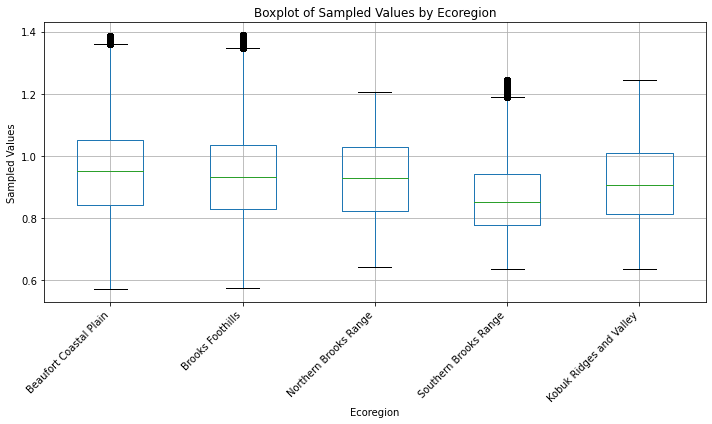

In [12]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\split_raster\ldmc_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_ldmc_std.tif': ('Beaufort Coastal Plain', 27012),
'Beaufort_Coastal_Plain_Floodplain_site6ab_ldmc_std.tif': ('Beaufort Coastal Plain', 18711),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_ldmc_std.tif': ('Beaufort Coastal Plain', 174819),
'Beaufort_Coastal_Plain_Floodplain_site6c_ldmc_std.tif': ('Beaufort Coastal Plain', 117206),
'Beaufort_Coastal_Plain_Coastal_Plain_site7_ldmc_std.tif': ('Beaufort Coastal Plain', 27237),
'Beaufort_Coastal_Plain_Floodplain_site7_ldmc_std.tif': ('Beaufort Coastal Plain', 235012),
'Brooks_Foothills_Floodplain_site4a_ldmc_std.tif': ('Brooks Foothills', 75950),
'Brooks_Foothills_Glaciated_Upland_site4a_ldmc_std.tif': ('Brooks Foothills', 273134),
'Brooks_Foothills_Upland_site4a_ldmc_std.tif': ('Brooks Foothills', 7396),
'Brooks_Foothills_Glaciated_Upland_site4b_ldmc_std.tif': ('Brooks Foothills', 242291),
'Brooks_Foothills_Upland_site6c_ldmc_std.tif': ('Brooks Foothills', 1226),
'Northern_Brooks_Range_Glaciated_Valley_site3b_ldmc_std.tif': ('Northern Brooks Range', 2772),
'Northern_Brooks_Range_Mountain_Rugged_site3b_ldmc_std.tif': ('Northern Brooks Range', 597227),
'Southern_Brooks_Range_Floodplain_site2a_c_1b_ldmc_std.tif': ('Southern Brooks Range', 67351),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_ldmc_std.tif': ('Southern Brooks Range',206872),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_ldmc_std.tif': ('Southern Brooks Range', 189803),
'Southern_Brooks_Range_Floodplain_site3b_ldmc_std.tif': ('Southern Brooks Range', 12425),
'Southern_Brooks_Range_Glaciated_Valley_site3b_ldmc_std.tif': ('Southern Brooks Range', 93369),
'Southern_Brooks_Range_Mountain_Rugged_site3b_ldmc_std.tif': ('Southern Brooks Range', 30176),
'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_ldmc_std.tif': ('Kobuk Ridges and Valley', 1182),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_ldmc_std.tif': ('Kobuk Ridges and Valley', 597227)
}

# List to store the summarized data for each ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        # Read the raster data (assuming the first band)
        data = src.read(1)
        
        # Create a mask to exclude NaN values
        valid_mask = ~np.isnan(data)
        
        # Get the indices of valid pixels
        valid_indices = np.column_stack(np.where(valid_mask))
        
        # Randomly sample points from valid pixels
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        # Extract the sampled pixel values
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        # Append sampled values to the corresponding ecoregion list
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({key: pd.Series(value) for key, value in ecoregion_values.items()})

# Create a boxplot for each ecoregion
plt.figure(figsize=(10, 6))
df_samples.boxplot()
plt.title('Boxplot of Sampled Values by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
'Beaufort_Coastal_Plain_Coastal_Plain_site6ab_d13c_ymax.tif': ('Beaufort Coastal Plain', 27780),
'Beaufort_Coastal_Plain_Floodplain_site6ab_d13c_ymax.tif': ('Beaufort Coastal Plain', 19244),
'Beaufort_Coastal_Plain_Coastal_Plain_site6c_d13c_ymax.tif': ('Beaufort Coastal Plain', 179792),
'Beaufort_Coastal_Plain_Floodplain_site6c_d13c_ymax.tif': ('Beaufort Coastal Plain', 120541),    
'Beaufort_Coastal_Plain_Coastal_Plain_site7_d13c_ymax.tif': ('Beaufort Coastal Plain', 28012),
'Beaufort_Coastal_Plain_Floodplain_site7_d13c_ymax.tif': ('Beaufort Coastal Plain', 241699),
'Brooks_Foothills_Floodplain_site4a_d13c_ymax.tif': ('Brooks Foothills', 78111),   
'Brooks_Foothills_Glaciated_Upland_site4a_d13c_ymax.tif': ('Brooks Foothills', 280905),
'Brooks_Foothills_Upland_site4a_d13c_ymax.tif': ('Brooks Foothills', 7607),      
'Brooks_Foothills_Glaciated_Upland_site4b_d13c_ymax.tif': ('Brooks Foothills', 249184),
'Brooks_Foothills_Upland_site6c_d13c_ymax.tif': ('Brooks Foothills', 1261),  
'Kobuk_Ridges_and_Valley_Floodplain_site2a_c_1b_d13c_ymax.tif': ('Kobuk Ridges and Valley', 1215),
'Kobuk_Ridges_and_Valley_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif': ('Kobuk Ridges and Valley', 615855),      
'Northern_Brooks_Range_Glaciated_Valley_site3b_d13c_ymax.tif': ('Northern Brooks Range', 2851),
'Northern_Brooks_Range_Mountain_Rugged_site3b_d13c_ymax.tif': ('Northern Brooks Range', 614220),   
'Southern_Brooks_Range_Floodplain_site2a_c_1b_d13c_ymax.tif': ('Southern Brooks Range', 69268),
'Southern_Brooks_Range_Glaciated_Valley_site2a_c_1b_d13c_ymax.tif': ('Southern Brooks Range',212758),
'Southern_Brooks_Range_Mountain_Rugged_site2a_c_1b_d13c_ymax.tif': ('Southern Brooks Range', 195203),
'Southern_Brooks_Range_Floodplain_site3b_d13c_ymax.tif': ('Southern Brooks Range', 12779),
'Southern_Brooks_Range_Glaciated_Valley_site3b_d13c_ymax.tif': ('Southern Brooks Range', 96026),
'Southern_Brooks_Range_Mountain_Rugged_site3b_d13c_ymax.tif': ('Southern Brooks Range', 31034)






